In [ ]:
!pip install scikit-plot -q

In [1]:
import openpyxl #biblioteca para abrir arquivos em excel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
from sklearn.model_selection import train_test_split # biblioteca para treino da arvore de decisão
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #para classificação e regressão as variáveis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # biblioteca para métricas do modelo
#bibliotecas para visualização das árvore arvore de decisão
from sklearn.tree import export_text
from sklearn import tree
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 
from sklearn.datasets import load_iris
import graphviz

In [2]:
#carregando os dados
bd1 = pd.read_excel("defaultCreditcardClients.xls")

In [3]:
#vendo as variáveis/colunas e as primeiras linhas
bd1.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
# checando quantas linhas e colunas tem o dataset
bd1.shape

(30001, 25)

In [5]:
# Checando nomes e tipos de variáveis do dataset
bd1.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [6]:
# contagem dos principais dados do dataset
bd1.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [7]:
#verificando existência e quantidade dados nulos - não há dados nulos neste dataframe
bd1.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [8]:
# Aqui retiramos a linha onde tinha apenas o nome da variável, pois esta estava sendo contada como valor sem o ser.
bd1_copy = bd1.iloc[1:]
bd1_copy

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


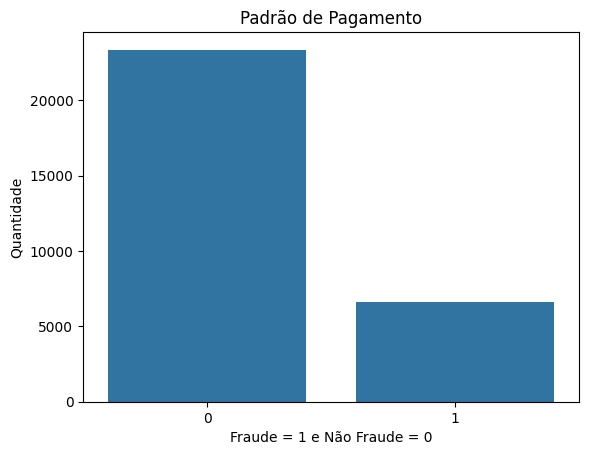

Proporção de fraude:
Y
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [9]:
#histograma as operações regulares de das operações tipo fraude
fig, ax = plt.subplots()
sns.countplot(x='Y', data=bd1_copy, ax=ax)
ax.set_title("Padrão de Pagamento")
ax.set_xlabel("Fraude = 1 e Não Fraude = 0")
ax.set_ylabel("Quantidade")
plt.show()
print(f"Proporção de fraude:\n{bd1_copy.Y.value_counts(normalize=True)}")

In [10]:
# Dividindo os dados em features eixo(X) e variável alvo eixo(y)
X = bd1_copy.drop(['Y','Unnamed: 0'],  axis=1)
y = bd1_copy['Y']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# criação do modelo de árvore de decisão regressora
infra_tree = DecisionTreeRegressor(random_state=42)
infra_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
# Extração das variáveis mais importantes
infra_features = infra_tree.feature_importances_

# Gerando um DataFrame as features com seus devidos pesos.
df_infra_features = pd.DataFrame({'Feature': X.columns, 'Peso': infra_features})

# Ordenando o DataFrame pelo peso.
df_infra_features = df_infra_features.sort_values(by='Peso', ascending=False)

# Exibindo features mais importantes
print("Features Mais Importantes por ordem decrescente de peso:")
print(df_infra_features.head())


Features Mais Importantes por ordem decrescente de peso:
   Feature      Peso
5       X6  0.163159
11     X12  0.068286
4       X5  0.063994
19     X20  0.058765
0       X1  0.058603


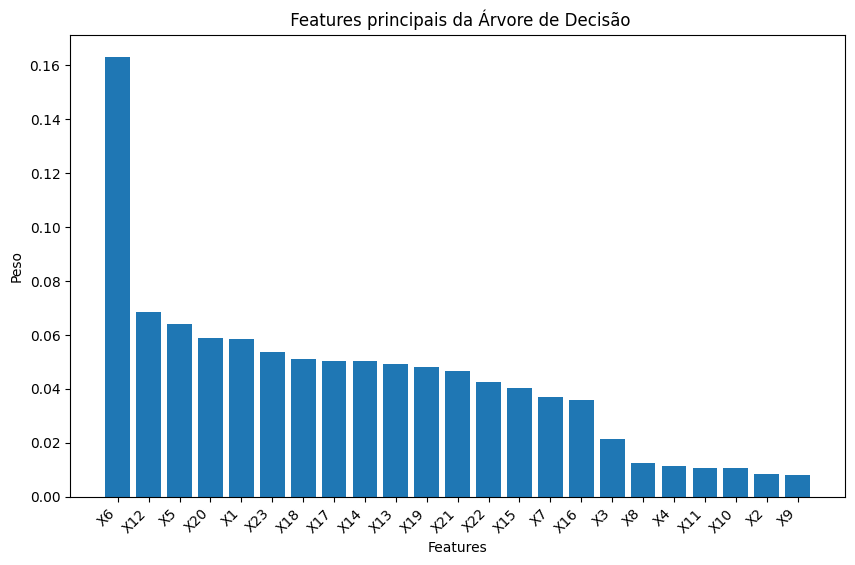

In [13]:
# Crie um gráfico de barras para visualizar as importâncias das features
plt.figure(figsize=(10, 6))
plt.bar(df_infra_features['Feature'], df_infra_features['Peso'])
plt.xlabel('Features')
plt.ylabel('Peso')
plt.title(' Features principais da Árvore de Decisão')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# diagrama de dispersão dos dados com combinações entre as 5 primeiras variáveis mais importantes combinadas com a variável "Y"
#fraude ou op. regular
sns.pairplot(bd1_copy, hue='Y', vars=['X6', 'X12', 'X5', 'X20','X1'])
plt.show()

In [14]:
#Aqui foi necessário converter a coluna Y de object para int para continuar o treino
bd1_copy.iloc[:, 24] = pd.to_numeric(bd1_copy.iloc[:, 24])

In [15]:
bd1_copy['Y'].unique()

array([1, 0], dtype=object)

In [18]:
bd1_copy=bd1_copy[['X6', 'X12', 'X5', 'X20','X1','Y']] 
bd1_copy.head()

,X6,X12,X5,X20,X1,Y
1,2,3913,24,0,20000,1
2,-1,2682,26,1000,120000,1
3,0,29239,34,1000,90000,0
4,0,46990,37,1200,50000,0
5,-1,8617,57,10000,50000,0


In [19]:
bd1_copy['Y_int']= bd1_copy.iloc[:, 5].astype(int)
bd1_copy['Y_int'].unique()

array([1, 0])

In [20]:
bd1_copy['Y_int']= bd1_copy.iloc[:, 5].astype(int)
bd1_copy['Y_int'].unique()

array([1, 0])

In [21]:
# Dividindo os dados em features eixo(X) e variável alvo eixo(y)
bd1_copy = bd1_copy.drop(columns=['Y'],  axis=1)
X = bd1_copy.drop(columns=['Y_int'],  axis=1)
y = bd1_copy['Y_int']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model_infra = DecisionTreeClassifier(random_state=42, max_depth=4)

In [23]:
model_infra.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [24]:
## Avaliando a Árvore de decisão

In [25]:
predictions = model_infra.predict(X_test)

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.30      0.42      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.63      0.65      6000
weighted avg       0.80      0.82      0.79      6000



In [27]:
print(confusion_matrix(y_test,predictions))

[[4512  175]
 [ 921  392]]


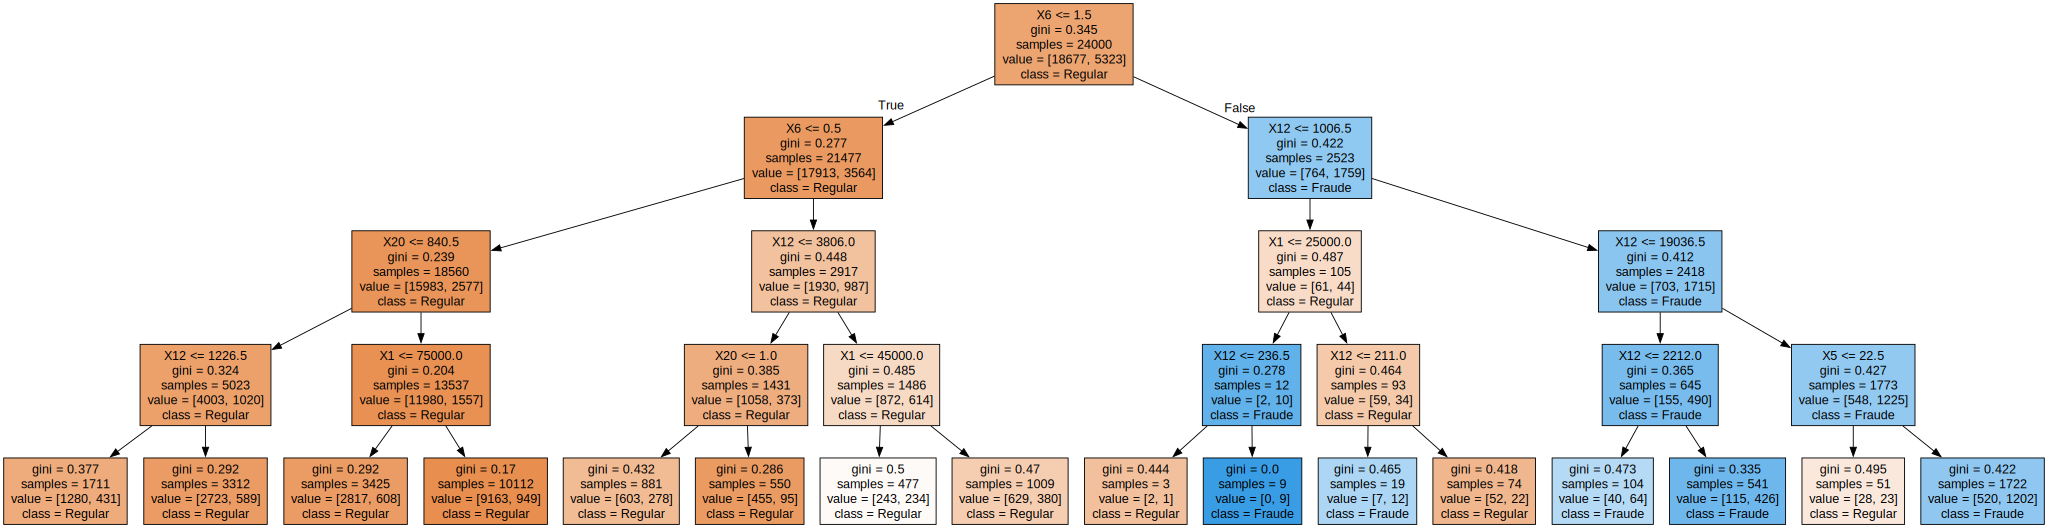

In [28]:
import os
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# DOT data
dot_data = tree.export_graphviz(model_infra, out_file=None,
feature_names=['X6', 'X12', 'X5', 'X20','X1'],
class_names=['Regular', 'Fraude'],
filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
#graph.render('arvore_1', format='png', cleanup=True)
graph

## Comparando com o modelo de Florestas aleatórias

In [29]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=4, max_depth=4, random_state=42)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=4, random_state=42)

In [30]:
rfc_pred = model_rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[4503  184]
 [ 897  416]]


In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.32      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



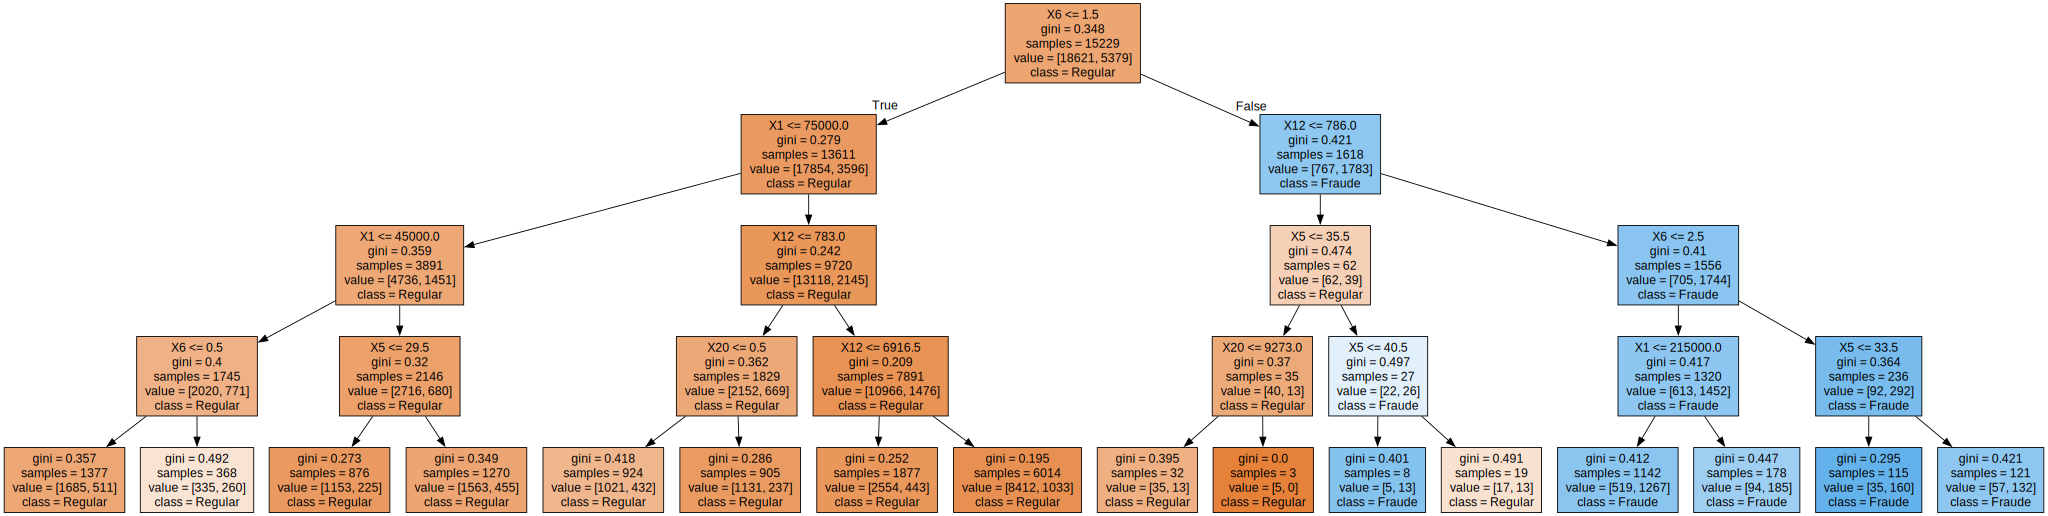

In [33]:
# DOT data
base_tree = model_rfc.estimators_[0] 
dot_data = tree.export_graphviz(base_tree, out_file=None,
feature_names=['X6', 'X12', 'X5', 'X20','X1'],
class_names=['Regular', 'Fraude'],
filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
#graph.render('arvore_1', format='png', cleanup=True)
graph